#### Problem Statement
 - This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
import seaborn as sns
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('data/stud.csv')

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
df.shape

(1000, 8)

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [10]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [11]:
print('Gender:            ',end= "")
print(df['gender'].unique())

print('race/ethnicity :      ',end=' ')
print(df['race/ethnicity'].unique())

print('parental level of education     :      ',end=' ')
print(df['parental level of education'].unique())

print('lunch:      ',end=' ')
print(df['lunch'].unique())

print('test preparation course :      ',end=' ')
print(df['test preparation course'].unique())


Gender:            ['female' 'male']
race/ethnicity :       ['group B' 'group C' 'group A' 'group D' 'group E']
parental level of education     :       ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch:       ['standard' 'free/reduced']
test preparation course :       ['none' 'completed']


In [12]:
#num and categorical column
numeric_feature=[feature for feature in df.columns if df[feature].dtype !='O']
categorical_feature=[feature for feature in df.columns if df[feature].dtype =='O']
print(numeric_feature,categorical_feature)

['math score', 'reading score', 'writing score'] ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [13]:
df['total_score']=df['math score']+df['reading score']+df['writing score']
df['average']=df['total_score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


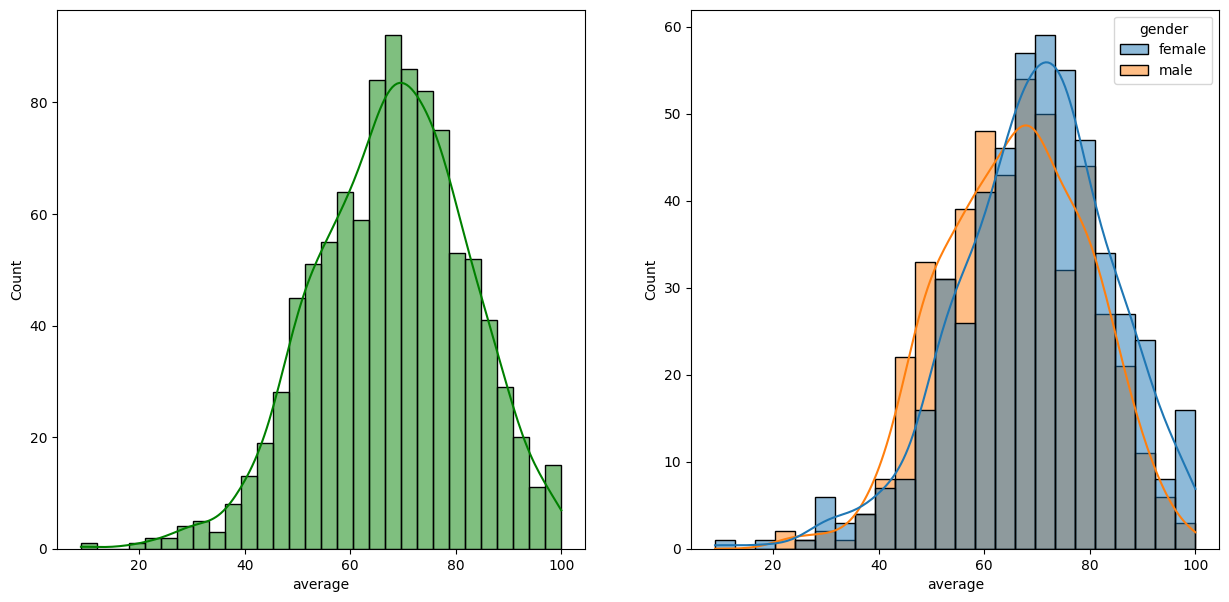

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

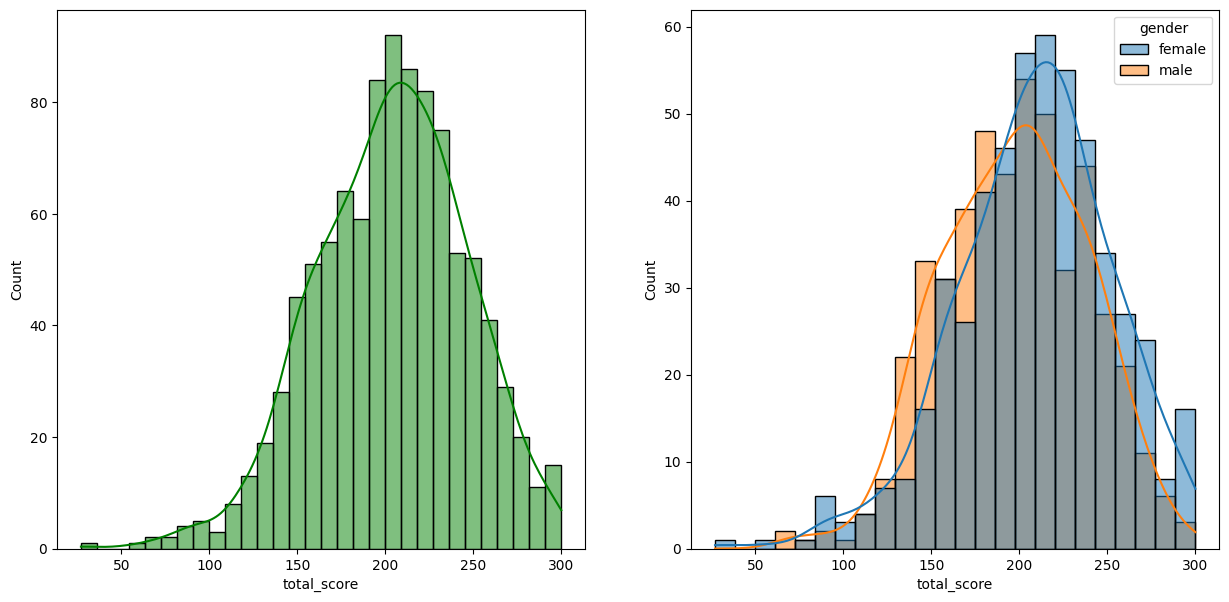

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

#### Insight
- Female students tend to score more

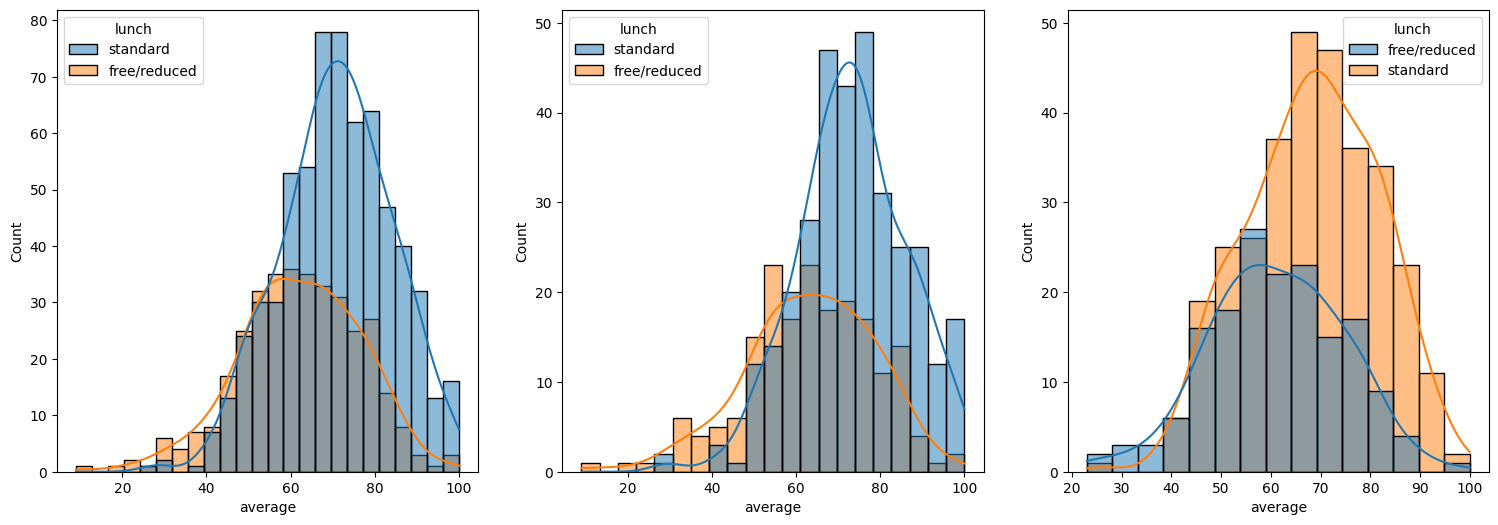

In [17]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

##### Insight
- Standard lunch helps perfrom better irrespective of gender

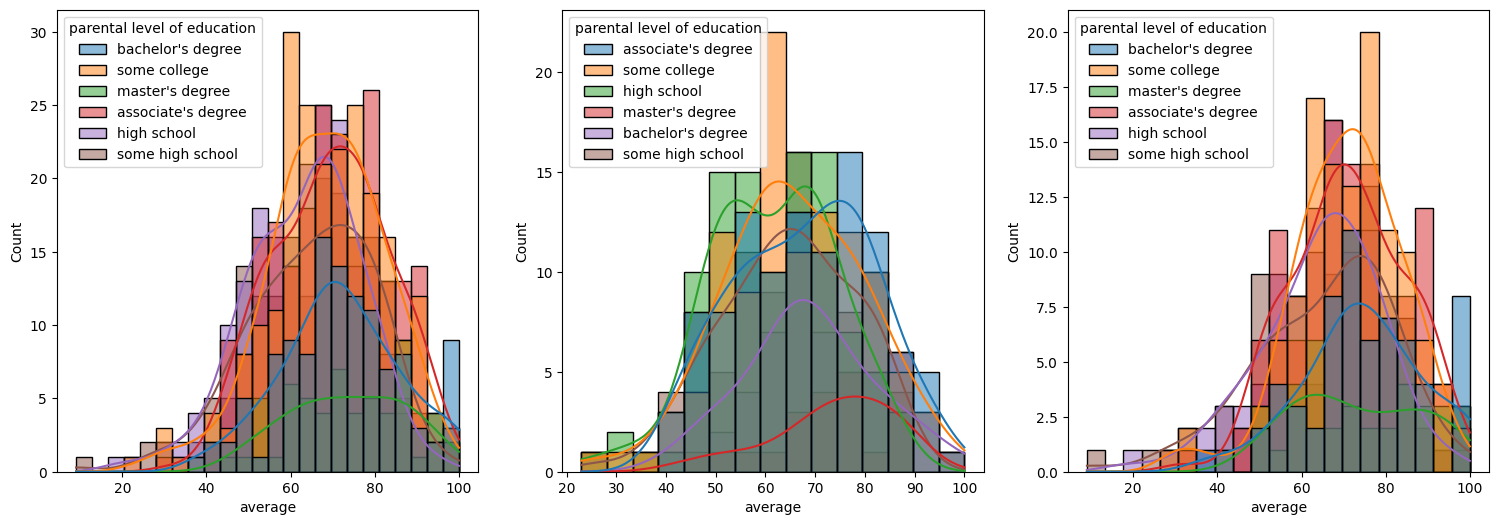

In [20]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental level of education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.show()

##### Insight
- General Trend:
   Students whose parents have a bachelor’s or associate’s degree tend to score higher on average than those whose parents have lower levels of education.
- Male Students (middle plot):

   Students whose parents have an associate’s degree appear to perform better, with a noticeable peak in the higher score range.

   Students with parents who completed some college are concentrated around the middle score range.

   No curve is present for students whose parents have a master’s degree, suggesting either no representation or insufficient data for that group.
- Female Students (right plot):
    
    Students whose parents have a bachelor’s degree tend to score the highest, as shown by the sharp peak in the 80–90 score range.

    This indicates a strong correlation between higher parental education (especially bachelor’s level) and better performance among female students.




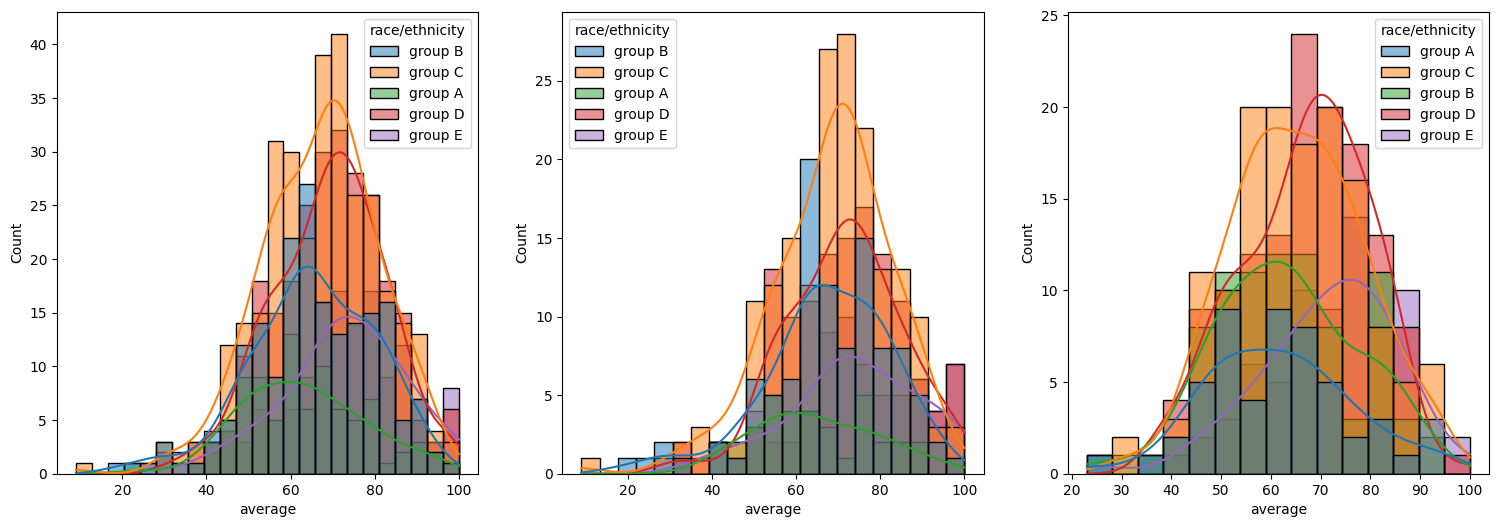

In [21]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')
plt.show()

#### Insights
- in general students of group A and B tend to score less and group C sutdents tend to score more in 60-80 ranges
- male students of group D tend to score more
- female students of group D and E score more

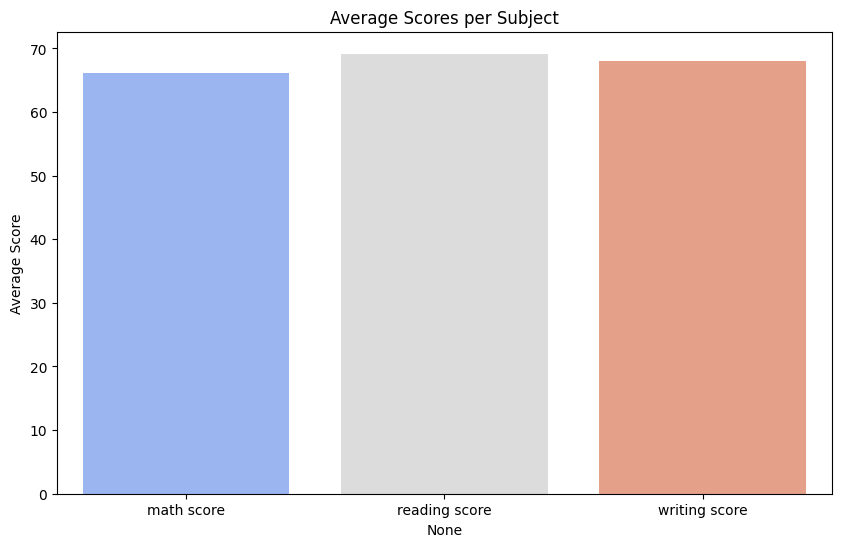

In [24]:
scores = df[['math score', 'reading score', 'writing score']].mean()
plt.figure(figsize=(10,6))
sns.barplot(x=scores.index, y=scores.values, palette='coolwarm')
plt.title("Average Scores per Subject")
plt.ylabel("Average Score")
plt.show()


#### Insight 
- Students tend to score more in reading and writing in the ranges of 60-70 while students seem to score less in maths

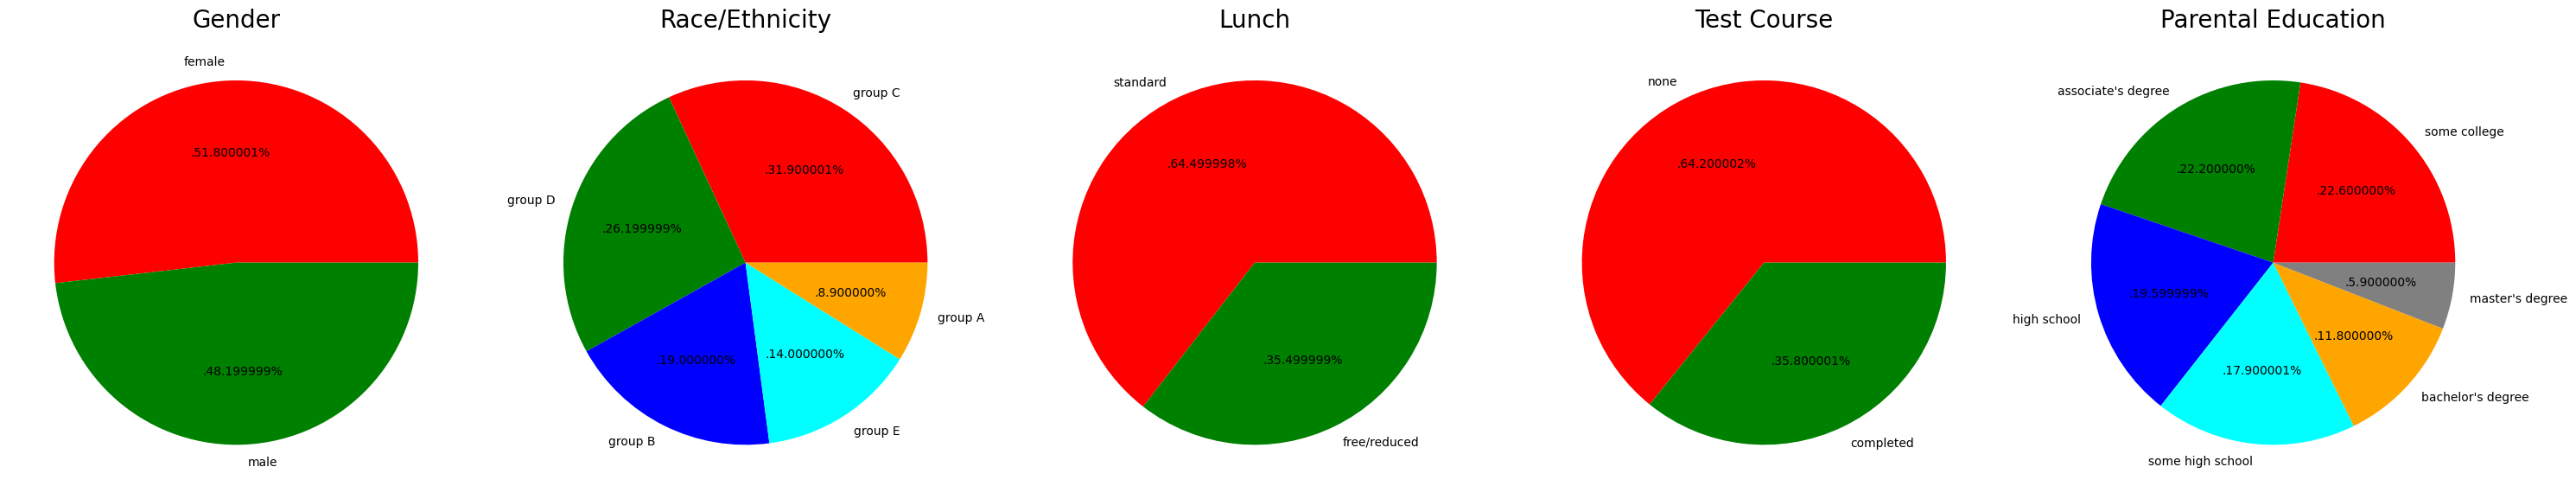

In [34]:
#Multivariate analysis

plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = size.index
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = size.index
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = size.index
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = size.index
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = size.index
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

#### Insights
- The class has just 2-3% more female students, almost equal strength
- There are more students of groups D and C, group c being the highest
- more students get standard lunch
- 65% of students not enrolled for the test course
- Majority of parents have a associate's degree or are from some college while only a few have a Master's      degree 

([<matplotlib.patches.Wedge at 0x15d2c4fdca0>,
 [Text(-0.06217041096298424, 1.0982417038160106, 'female'),
  Text(0.06782226650507357, -1.1980818587083752, 'male')],
 [Text(-0.033911133252536856, 0.5990409293541875, '51.8%'),
  Text(0.03956298879462625, -0.698881084246552, '48.2%')])

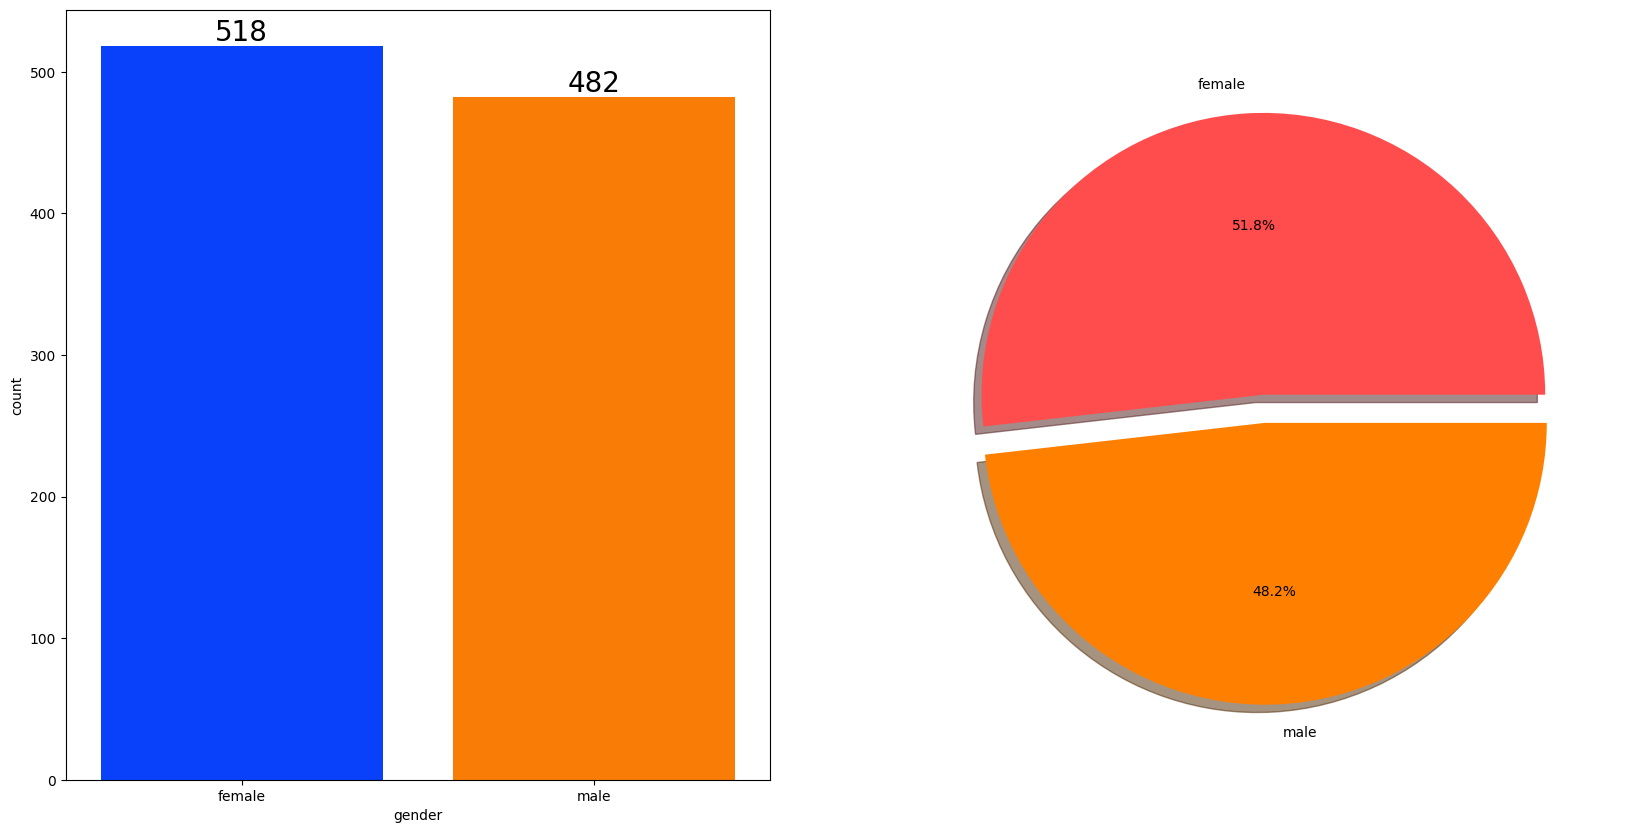

In [ ]:
# univariate analysis
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    

counts = df['gender'].value_counts()
plt.pie(
    x=counts.values,
    labels=counts.index,  
    explode=[0, 0.1],
    autopct='%1.1f%%',
    shadow=True,
    colors=['#ff4d4d', '#ff8000']
)


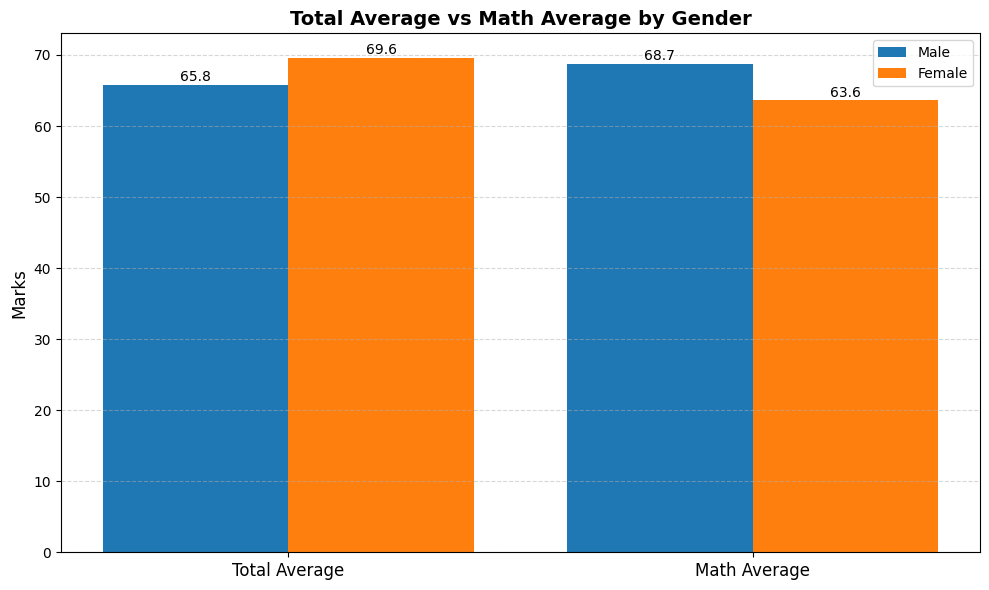

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

gender_group = df.groupby('gender').mean(numeric_only=True)

X = ['Total Average', 'Math Average']
female_scores = [gender_group.loc['female', 'average'], gender_group.loc['female', 'math score']]
male_scores = [gender_group.loc['male', 'average'], gender_group.loc['male', 'math score']]

X_axis = np.arange(len(X))

plt.figure(figsize=(10, 6))
bar1 = plt.bar(X_axis - 0.2, male_scores, 0.4, label='Male', color='#1f77b4')
bar2 = plt.bar(X_axis + 0.2, female_scores, 0.4, label='Female', color='#ff7f0e')

plt.xticks(X_axis, X, fontsize=12)
plt.ylabel("Marks", fontsize=12)
plt.title("Total Average vs Math Average by Gender", fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()

for bar in bar1 + bar2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.5, f'{yval:.1f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


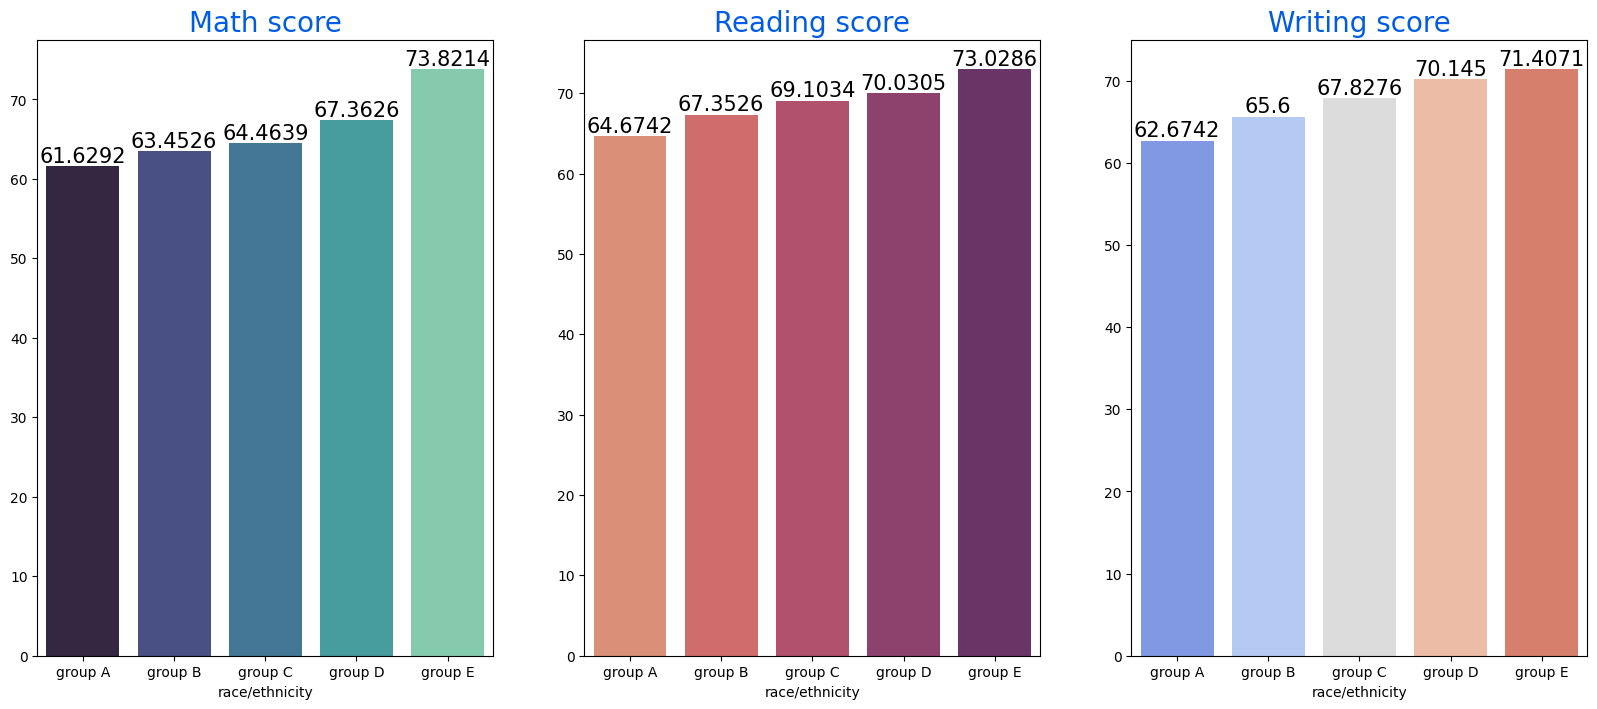

In [38]:
Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)